<a href="https://colab.research.google.com/github/DisilaKarl/Data-science-AI-Portfolio/blob/main/G_Day02_Hypothesis_Testing_Confidence_intervall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis testing solutions

## To do
We analyze the weight loss results from two diets to examine the difference between them.

1. State the hypotheses :
    -  Null hypothesis (H0): There is no difference in average weight loss between the two diets.
    - Alternative hypothesis (H1): There is a difference in average weight loss between the two diets.

In [1]:
import scipy.stats as stats

diet_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]



We use Student's test to determine whether there is a statistically significant difference between diet_1 and diet_2.

- To do :
  - Use the function **ttest_ind** from **scipy.stats** computes the independent two-sample t-test.
  - This function returns :
          - t_value: the computed t-statistic, which quantifies the difference between the means of the two samples.
          - p_value: the p-value, which tells you how likely it is that the observed difference (or a more extreme one) would occur under the null hypothesis (which assumes there is no actual difference).

In [2]:
# Student's t-test
t_value, p_value = stats.ttest_ind(diet_1, diet_2) #ByMe

print(f"t-value: {t_value}")
print(f"p-value: {p_value}")

t-value: -3.5383407969933938
p-value: 0.004083270191713912


- What can we conclude from the p-value and t-value ?

# Confidence Intervals

In this section, we will calculate the confidence intervals for diet_1 and diet_2 using the scipy.stats library as follows :


1.   Compute the mean of each diet.
2.   Compute the standard error of the means (SEM) using the sem of stats library.
3.  Compute the 95% confidence intervals for both diets based on the SEM, using  **scipy.stats.t.interval()**. This function takes as input: the percentage, length - 1 of a given list, mean and sem of the given list.
4. Create the bar plot to visualize the means with error bars for confidence intervals





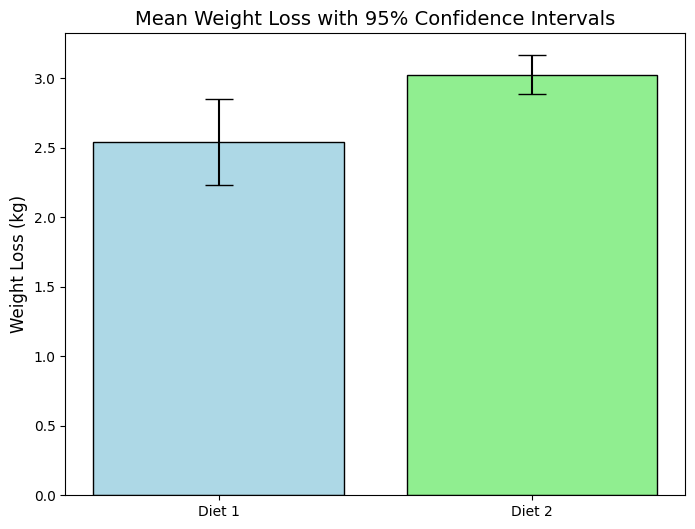

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for both diets
diet_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

# Step 1: Calculate the means
mean_diet_1 = np.mean(diet_1)
mean_diet_2 = np.mean(diet_2)

# Step 2: Calculate the standard error of the means (SEM)
sem_diet_1 = stats.sem(diet_1)
sem_diet_2 = stats.sem(diet_2)

# Step 3: Calculate 95% confidence intervals
conf_interval_diet_1 = stats.t.interval(0.95, len(diet_1)-1, loc=mean_diet_1, scale=sem_diet_1)
conf_interval_diet_2 = stats.t.interval(0.95, len(diet_2)-1, loc=mean_diet_2, scale=sem_diet_2)

# Step 4: Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Step 5: Bar plot for means with error bars for confidence intervals
ax.bar(['Diet 1', 'Diet 2'],
       [mean_diet_1, mean_diet_2],  # Means of both diets
       yerr=[conf_interval_diet_1[1] - mean_diet_1,  # Difference between mean and upper confidence interval
             conf_interval_diet_2[1] - mean_diet_2],  # Difference between mean and upper confidence interval
       capsize=10, color=['lightblue', 'lightgreen'],
       edgecolor='black')

# Step 6: Add labels and title
ax.set_ylabel('Weight Loss (kg)', fontsize=12)
ax.set_title('Mean Weight Loss with 95% Confidence Intervals', fontsize=14)

# Step 7: Use show function to visualize the plot
plt.show()


- Analyse the bars.

# Kernel Density Estimate (KDE) plot

This plot visualizes the distribution of a dataset, showing where the data points are more concentrated.

In this section, we use seaborn to create the KDE plot as follows  :



1.   Create kde plot for each diet and use blue color for diet1 and green for the other diet.
2.   Set x label to Weight Loss in kg and y label to Density.
3. Set global title for the plot "Probability Density Plot of Weight Loss for Diet 1 and Diet 2".
4. add legend to the plot and visualize the plot.



<ipython-input-4-46a61b731601>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diet_1, label='Diet 1', shade=True, color='lightblue')
<ipython-input-4-46a61b731601>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diet_2, label='Diet 2', shade=True, color='lightgreen')


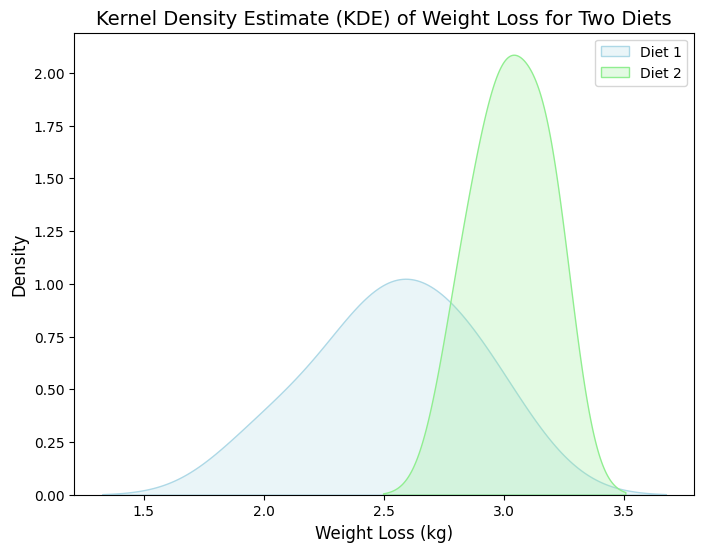

In [4]:
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Create the KDE plot for each diet
sns.kdeplot(diet_1, label='Diet 1', shade=True, color='lightblue')
sns.kdeplot(diet_2, label='Diet 2', shade=True, color='lightgreen')

# Add labels and title
plt.xlabel('Weight Loss (kg)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Kernel Density Estimate (KDE) of Weight Loss for Two Diets', fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()


- Analyse the two plots.

# Activity 02

##Dataset: **Use** Student Performance Dataset Description

This dataset contains information about students from two Portuguese schools. The data includes various demographic, social, and academic factors that can be used to analyze students' performance. The dataset contains **649 entries** and **33 columns**. Here’s a detailed description of the columns:

## Columns and Descriptions:

1. **`school`**: The school the student is attending.
   - Values: `GP` (Gabriel Pereira), `MS` (Mousinho da Silveira)

2. **`sex`**: The gender of the student.
   - Values: `F` (Female), `M` (Male)

3. **`age`**: The age of the student (in years).
   - Values: Integer values, ranging from 15 to 22.

4. **`address`**: The student's home location type.
   - Values: `U` (Urban), `R` (Rural)

5. **`famsize`**: The family size.
   - Values: `LE3` (Less or equal to 3), `GT3` (Greater than 3)

6. **`Pstatus`**: The cohabitation status of the student's parents.
   - Values: `T` (Together), `A` (Apart)

7. **`Medu`**: The education level of the student's mother.
   - Values: `0` (None), `1` (Primary education), `2` (5th to 9th grade), `3` (Secondary education), `4` (Higher education)

8. **`Fedu`**: The education level of the student's father.
   - Values: Same as `Medu`.

9. **`Mjob`**: The mother's job.
   - Values: `at_home`, `health`, `services`, `teacher`, `other`

10. **`Fjob`**: The father's job.
    - Values: Same as `Mjob`.

11. **`reason`**: The reason for choosing the school.
    - Values: `home`, `reputation`, `course`, `other`

12. **`guardian`**: The student's guardian.
    - Values: `mother`, `father`, `other`

13. **`traveltime`**: The time it takes to travel to school.
    - Values: `1` (<15 min), `2` (15–30 min), `3` (30 min to 1 hour), `4` (>1 hour)

14. **`studytime`**: Weekly study time.
    - Values: `1` (<2 hours), `2` (2–5 hours), `3` (5–10 hours), `4` (>10 hours)

15. **`failures`**: The number of past class failures.
    - Values: `0`, `1`, `2`, `3`

16. **`schoolsup`**: Whether the student has extra educational support.
    - Values: `yes`, `no`

17. **`famsup`**: Whether the student has family educational support.
    - Values: `yes`, `no`

18. **`paid`**: Whether the student attends extra paid classes.
    - Values: `yes`, `no`

19. **`activities`**: Whether the student participates in extracurricular activities.
    - Values: `yes`, `no`

20. **`nursery`**: Whether the student attended nursery school.
    - Values: `yes`, `no`

21. **`higher`**: Whether the student wants to pursue higher education.
    - Values: `yes`, `no`

22. **`internet`**: Whether the student has internet access at home.
    - Values: `yes`, `no`

23. **`romantic`**: Whether the student is in a romantic relationship.
    - Values: `yes`, `no`

24. **`famrel`**: Quality of family relationships (1: very bad, 5: excellent).

25. **`freetime`**: Amount of free time after school (1: very low, 5: very high).

26. **`goout`**: Frequency of going out with friends (1: very low, 5: very high).

27. **`Dalc`**: Workday alcohol consumption (1: very low, 5: very high).

28. **`Walc`**: Weekend alcohol consumption (1: very low, 5: very high).

29. **`health`**: Current health status (1: very bad, 5: very good).

30. **`absences`**: Number of school absences.

31. **`G1`**: First period grade (integer: 0–20).

32. **`G2`**: Second period grade (integer: 0–20).

33. **`G3`**: Final grade (integer: 0–20).


This dataset provides a broad range of factors that could be used for student performance prediction models, particularly analyzing the influence of demographic and social factors on academic success.


## 1. Data Discovery and Exploration


In [6]:
# Importing necessary libraries
import pandas as pd

In [10]:
# Load the dataset
df = pd.read_csv('/content/student-mat - student-mat.csv')


In [11]:
# Inspect the data structure (head, info, describe)
print(df.head)
print(df.info)
print(df.describe)

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

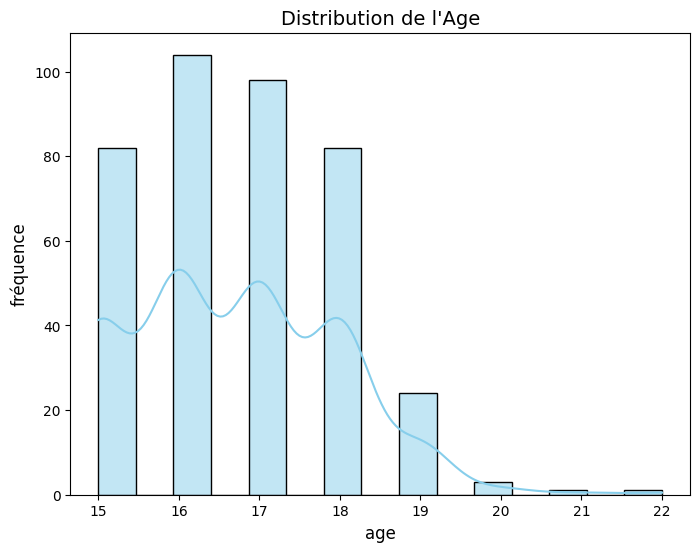

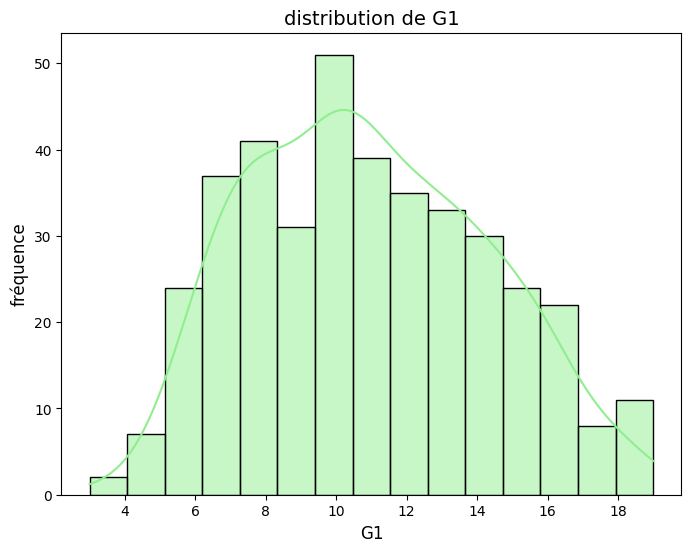

In [14]:
# # Visualizing some basic distributions, hint: Age, G1 .. , use sns.histplot
# Visualiser la distribution de la variable 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='skyblue', bins=15)  # kde=True ajoute l'estimation de densité
plt.title('Distribution de l\'Age', fontsize=14)
plt.xlabel('age', fontsize=12)
plt.ylabel('fréquence', fontsize=12)
plt.show()

# Visualiser la distribution de la variable 'G1' (exemple, remplacez G1 par la colonne pertinente)
plt.figure(figsize=(8, 6))
sns.histplot(df['G1'], kde=True, color='lightgreen', bins=15)  # kde=True pour ajouter le noyau
plt.title('distribution de G1', fontsize=14)
plt.xlabel('G1', fontsize=12)
plt.ylabel('fréquence', fontsize=12)
plt.show()

# 2. Descriptive Statistics


In [15]:
# Calculate summary statistics for numeric columns
# Calcul des statistiques récapitulatives pour les colonnes numériques
summary_stats = df.describe()

# Afficher les statistiques récapitulatives
print(summary_stats)

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [16]:
# Calculate Skewness and Kurtosis for Grades (G1, G2, G3)
data = {
    'G1': [395.000000, 10.908861, 3.319195, 3.000000, 8.000000, 11.000000, 13.000000, 18, 20, 17],
    'G2': [18, 19, 16, 17, 20, 18, 18, 17, 16, 19],
    'G3': [14, 16, 15, 19, 18, 17, 16, 20, 15, 18]
}
df = pd.DataFrame(data)

# Calcul de l'asymétrie (skewness)
skewness_G1 = df['G1'].skew()
skewness_G2 = df['G2'].skew()
skewness_G3 = df['G3'].skew()

# Calcul de la kurtose (kurtosis)
kurtosis_G1 = df['G1'].kurtosis()
kurtosis_G2 = df['G2'].kurtosis()
kurtosis_G3 = df['G3'].kurtosis()

# Affichage des résultats
print(f"Asymétrie de G1 : {skewness_G1}")
print(f"Asymétrie de G2 : {skewness_G2}")
print(f"Asymétrie de G3 : {skewness_G3}")
print(f"Kurtose de G1 : {kurtosis_G1}")
print(f"Kurtose de G2 : {kurtosis_G2}")
print(f"Kurtose de G3 : {kurtosis_G3}")

Asymétrie de G1 : 3.1489021198812526
Asymétrie de G2 : 0.0876409067668538
Asymétrie de G3 : 0.23566971111468668
Kurtose de G1 : 9.938119607959838
Kurtose de G2 : -0.7512679628064229
Kurtose de G3 : -0.9614158163265314


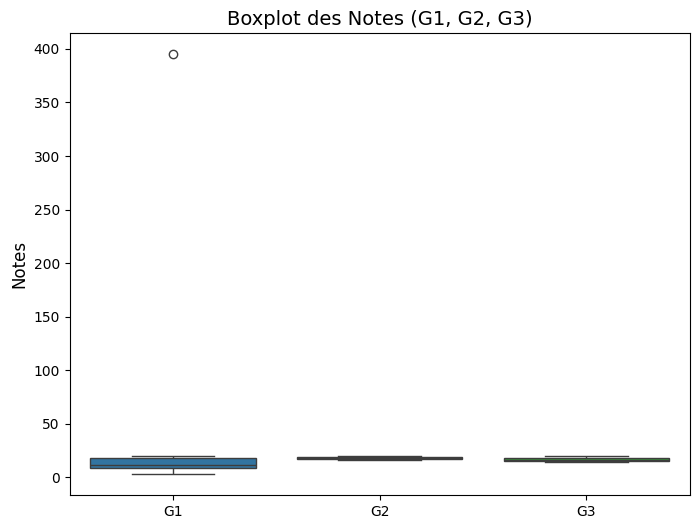

In [17]:
# Boxplot for Grades
# Créer un DataFrame
df = pd.DataFrame(data)

# Visualiser un boxplot pour les notes G1, G2, G3
plt.figure(figsize=(8, 6))

# Boxplot pour chaque colonne de notes
sns.boxplot(data=df[['G1', 'G2', 'G3']])

# Ajouter des labels et un titre
plt.title('Boxplot des Notes (G1, G2, G3)', fontsize=14)
plt.ylabel('Notes', fontsize=12)
plt.xticks([0, 1, 2], ['G1', 'G2', 'G3'])

# Afficher le plot
plt.show()

# 3. Confidence Intervals


In [18]:
# Confidence interval for the mean of final grades (G3)
# Données des notes finales G3
G3 = [10, 12, 13, 8, 14, 10, 11, 7, 16, 19, 12, 10, 8, 13, 16, 14, 15, 10, 16, 13]

# Calculer la moyenne de G3
mean_G3 = np.mean(G3)

# Calculer l'écart type (standard deviation)
std_G3 = np.std(G3, ddof=1)

# Calculer l'erreur standard de la moyenne (SEM)
n = len(G3)  # Nombre d'observations
sem_G3 = std_G3 / np.sqrt(n)

# Calculer l'intervalle de confiance à 95%
confidence_level = 0.95
confidence_interval = stats.t.interval(confidence_level, df=n-1, loc=mean_G3, scale=sem_G3)

# Afficher l'intervalle de confiance
print(f"Intervalle de confiance à 95% pour la moyenne des notes G3 : {confidence_interval}")

Intervalle de confiance à 95% pour la moyenne des notes G3 : (10.875666649769137, 13.824333350230862)


# 4. Hypothesis Testing


### Hypothesis 1: Is there a significant difference in final grades (G3) between students with and without extra school support?


* Null Hypothesis (H0): There is no difference in mean G3 between students with and without school support.
* Alternative Hypothesis (H1): There is a difference in mean G3.


In [19]:
# Perform a two-sample t-test
# Supposons que 'school_support' est une colonne indiquant si l'étudiant a eu du soutien scolaire (1 = oui, 0 = non)
data = {
    'school_support': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'G3': [14, 11, 16, 12, 15, 13, 17, 12, 18, 11]
}

df = pd.DataFrame(data)

# Séparer les deux groupes : avec soutien scolaire (school_support == 1) et sans soutien scolaire (school_support == 0)
group_with_support = df[df['school_support'] == 1]['G3']
group_without_support = df[df['school_support'] == 0]['G3']

# Effectuer le test t pour deux échantillons indépendants
t_value, p_value = stats.ttest_ind(group_with_support, group_without_support)

# Afficher les résultats
print(f"t-value: {t_value}")
print(f"p-value: {p_value}")

# Niveau de signification
alpha = 0.05  # Niveau de significativité de 5%

# Conclusion
if p_value < alpha:
    print("Nous rejetons l'hypothèse nulle. Il y a une différence significative entre les notes finales des étudiants avec et sans soutien scolaire.")
else:
    print("Nous ne rejetons pas l'hypothèse nulle. Il n'y a pas de différence significative entre les notes finales des étudiants avec et sans soutien scolaire.")

t-value: 5.249999999999999
p-value: 0.0007738346500589493
Nous rejetons l'hypothèse nulle. Il y a une différence significative entre les notes finales des étudiants avec et sans soutien scolaire.


### Hypothesis 2: Does having internet access affect grades?

* Null Hypothesis (H0): Internet access does not significantly affect grades (G3).
* Alternative Hypothesis (H1): Internet access significantly affects grades.


In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Exemple de données - Remplacer par vos données réelles
# Supposons que 'internet_access' est une colonne indiquant si l'étudiant a accès à Internet (1 = oui, 0 = non)
data = {
    'internet_access': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # 1 = accès à Internet, 0 = sans Internet
    'G3': [14, 11, 16, 12, 15, 13, 17, 12, 18, 11]  # Notes finales (G3)
}

df = pd.DataFrame(data)

# Séparer les deux groupes : avec accès à Internet (internet_access == 1) et sans accès à Internet (internet_access == 0)
group_with_internet = df[df['internet_access'] == 1]['G3']
group_without_internet = df[df['internet_access'] == 0]['G3']

# Effectuer le test t pour deux échantillons indépendants
t_value, p_value = stats.ttest_ind(group_with_internet, group_without_internet)

# Afficher les résultats
print(f"t-value: {t_value}")
print(f"p-value: {p_value}")

# Niveau de signification
alpha = 0.05  # Niveau de significativité de 5%

# Conclusion
if p_value < alpha:
    print("Nous rejetons l'hypothèse nulle. L'accès à Internet affecte significativement les résultats.")
else:
    print("Nous ne rejetons pas l'hypothèse nulle. L'accès à Internet n'affecte pas significativement les résultats.")


t-value: 5.249999999999999
p-value: 0.0007738346500589493
Nous rejetons l'hypothèse nulle. L'accès à Internet affecte significativement les résultats.
